In [1]:
# Geopandas，其他GIS工具Pyecharts
# 依赖包需要依次安装，最后安装Geopandas：
# GDAL、Fina、pyproj、Rtree、shapely、
# GDAL的安装：①brew install GDAL安装GDAL;②brew info GDAL查看GDAL版本；③pip install GDAL==3.5.2（与brew安装的版本一致）
# 安装完的GDAL无法直接import gdal，但是from osgeo import gdal却可以
# 因此，写以下脚本放置与site-packages文件夹中
# from osgeo.gdal import deprecation_warn
# deprecation_warn('gdal')
# from osgeo.gdal import *
# pycharm无法使用gdal和geopandas，因此使用jupyter notebook进行绘图。

In [170]:
import geopandas as gpd
import shapely.geometry as geo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('OK!')

OK!


In [2]:
pnt = geo.Point(0,0)
print('This distance between point(0.0) and (1,1) is:', pnt.distance(geo.Point(1,1)))
gpd.GeoSeries([geo.Point(0,0),
               geo.Point(0,1),
               geo.Point(1,1),
               geo.Point(1,0)],
             index=['a','b','c','d'])

This distance between point(0.0) and (1,1) is: 1.4142135623730951


a    POINT (0.00000 0.00000)
b    POINT (0.00000 1.00000)
c    POINT (1.00000 1.00000)
d    POINT (1.00000 0.00000)
dtype: geometry

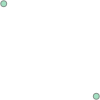

In [12]:
multi_pnt = gpd.GeoSeries([geo.MultiPoint([(0,1),(1,0)]),
                           geo.MultiPoint([(0,0),(1,1)])],
                           index=['a','b'])
multi_pnt[0]

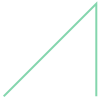

In [15]:
line = gpd.GeoSeries([geo.LineString([(0,0),(1,1),(1,0)]),
                     geo.LineString([(0,0),(0,1),(-1,0)])],
                    index=['a','b'])
line[0]

Area is: 0.0
Length is: 3.0
Bounds is: (0.0, 0.0, 1.0, 1.0)
Coords is: (0.0, 0.0) (0.0, 1.0) (1.0, 1.0) (1.0, 0.0)


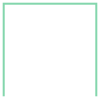

In [23]:
line = geo.LineString([(0,0),(0,1),(1,1),(1,0)])
print('Area is:', line.area)
print('Length is:', line.length)
print('Bounds is:', line.bounds) # 顶点坐标
print('Coords is:', *line.coords) # *将列表解开成几个独立的参数，传入函数
line

Area is: 0.0
Length is: 4.0
Bounds is: (0.0, 0.0, 1.0, 1.0)
Coords is: (0.0, 0.0) (0.0, 1.0) (1.0, 1.0) (1.0, 0.0) (0.0, 0.0)


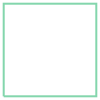

In [24]:
ring = geo.LinearRing([(0,0),(0,1),(1,1),(1,0)])
print('Area is:', ring.area)
print('Length is:', ring.length)
print('Bounds is:', ring.bounds)
print('Coords is:', *ring.coords)
ring

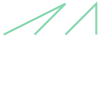

In [26]:
geo.MultiLineString([[(0,0),(1,1),(1,0)],[(-2,0),(0,1),(-1,0)]])

Area is: 5.0
Length is: 8.82842712474619
Bounds is: (0.0, 0.0, 3.0, 2.0)
Coords is: (0.0, 0.0) (0.0, 2.0) (2.0, 2.0) (3.0, 1.0) (2.0, 0.0) (0.0, 0.0)


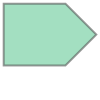

In [29]:
polygon = geo.Polygon([(0,0),(0,2),(2,2),(3,1),(2,0)])
print('Area is:', polygon.area)
print('Length is:', polygon.length)
print('Bounds is:', polygon.bounds)
print('Coords is:', *polygon.exterior.coords) # Polygon可以分为有孔与无孔，所以其边界coords需要指明为 exterior。
polygon

Area is: 83.5
Length is: 69.8309518948453
Bounds is: (0.0, 0.0, 10.0, 10.0)
Coords is: (0.0, 0.0) (10.0, 0.0) (10.0, 10.0) (0.0, 10.0) (0.0, 0.0)


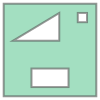

In [30]:
polygon1 = geo.Polygon([(0,0),(10,0),(10,10),(0,10)],
                      [
                          ((3,3),(7,3),(7,1),(3,1)),
                          ((9,9),(9,8),(8,8),(8,9)),
                          ((1,6),(6,6),(6,9))
                      ])
# 总计3个孔
print('Area is:', polygon1.area)
print('Length is:', polygon1.length)
print('Bounds is:', polygon1.bounds)
print('Coords is:', *polygon1.exterior.coords)
polygon1

Area is: 1.5
Length is: 7.414213562373095
Bounds is: (0.0, 0.0, 3.0, 3.0)


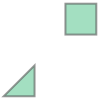

In [32]:
multi_polygon = geo.MultiPolygon([geo.Polygon([(0,0),(1,1),(1,0)]),
                                 geo.Polygon([(2,2),(2,3),(3,3),(3,2),(2,2)])])
print('Area is:', multi_polygon.area)
print('Length is:', multi_polygon.length)
print('Bounds is:', multi_polygon.bounds)
multi_polygon

In [35]:
# 按顺序连线时穿过了之前定义的边，定义为不合法
s_ = gpd.GeoSeries([geo.Polygon([(4,0),(6,1),(4,1),(6,0)]),
                   geo.MultiPolygon([geo.Polygon([(4,0),(5,0.5),(6,0)]),
                                    geo.Polygon([(5,0.5),(6,1),(4,1)])])])
s_.is_valid #s_valid”属性输出每个几何体是否满足合法性检查

0    False
1     True
dtype: bool

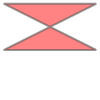

In [36]:
s_[0] # 第一个几何体因为有交叉部分所以不合法

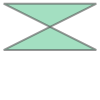

In [37]:
s_[1] # 第二个几何体为两个Polygon拼接所成，满足合法性检查

<AxesSubplot:>

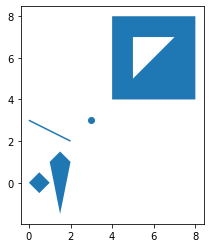

In [9]:
# 构建一个包含多个几何体的GeoSeries
s = gpd.GeoSeries([geo.Polygon([(0,0),(0.5,0.5),(1,0),(0.5,-0.5)]),
                  geo.Polygon([(1,1),(1.5,1.5),(2,1),(1.5,-1.5)]),
                  geo.Point(3,3),
                  geo.LineString([(2,2),(0,3)]),
                  geo.Polygon([(4,4),(8,4),(8,8),(4,8)],[((5,5),(5,7),(7,7))])])
s.plot()

<AxesSubplot:>

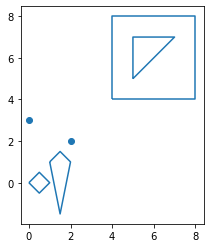

In [10]:
# 使用 boundary 属性返回各个几何体对象的低维简化表达
s.boundary.plot()

In [12]:
# centroid返回每个几何对象的重心(几何中心)
print(s.centroid)

0    POINT (0.50000 -0.00000)
1     POINT (1.50000 0.33333)
2     POINT (3.00000 3.00000)
3     POINT (1.00000 2.50000)
4     POINT (6.04762 5.95238)
dtype: geometry


<AxesSubplot:>

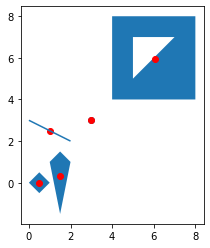

In [13]:
# 可视化每个几何体的几何中心
ax = s.plot()
s.centroid.plot(ax=ax,color='red')

In [26]:
# np.random.normal从正态（高斯）分布中抽取随机样本。loc为均值，scale为标准差，size为输出值的纬度
a = np.random.normal(loc=0,scale=2,size=[10,2]).tolist()
b = np.random.normal(loc=5,scale=2,size=[10,2]).tolist()
s1 = gpd.GeoSeries([geo.MultiPoint(a),
                   geo.MultiPoint(b)])
print(a)
print('*'*40)
print(len(b))
print('*'*40)

# convex_hull返回一个由Polygon组成的GeoSeries
print(s1.convex_hull)

[[-1.23452463752588, 0.48319922846669394], [0.3158460484311852, -2.142113976158648], [2.634838065146557, 0.05686886704939266], [0.9704286518695902, -1.3737954500351375], [-1.2307314347315303, -0.7343530332010783], [1.010753567606596, 0.8268995396816808], [0.8496531116222124, -1.0614782372340146], [-1.832644032018119, -1.2232632766616574], [2.7495800931392087, -1.4169791602484643], [-1.0646567302417624, -0.2698217730436522]]
****************************************
10
****************************************
0    POLYGON ((0.31585 -2.14211, -1.83264 -1.22326,...
1    POLYGON ((3.27481 2.95726, 3.16688 3.38209, 2....
dtype: geometry


<AxesSubplot:>

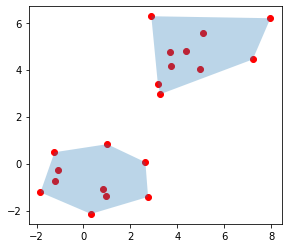

In [33]:
# 可视化凸包，红点为原几何对象，浅蓝色面为包含 红点的凸包,凸包为包含原几何体的最小几何对象(可以是矩形，也可以是不规则几何体)
ax = s1.plot(color='red')
s1.convex_hull.plot(ax=ax,alpha=0.3)

0    POLYGON ((-1.83264 -2.14211, 2.74958 -2.14211,...
1    POLYGON ((2.88673 2.95726, 7.95889 2.95726, 7....
dtype: geometry


<AxesSubplot:>

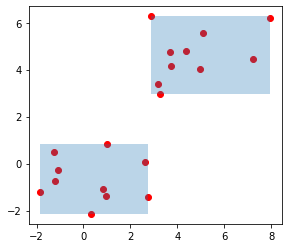

In [32]:
# envelope 属性返回对应几何对象的box范围，Polygon格式，即包含对应元素中所有点的最小矩形
print(s1.envelope)
ax = s1.plot(color='red')
s1.envelope.plot(ax=ax,alpha=0.3)

In [53]:
contents = [(loc,0.5) for loc in range(0,10,2)]
columns=['Mean','SD'] # 暂时不清楚为什么columns无法加到GeoDataFrame中,所以先建立DataFrame
df = pd.DataFrame(np.array(contents),columns=columns,index=[0,1,2,3,4])
geometry = [geo.MultiPoint(np.random.normal(loc=loc,scale=scale,size=[10,3]).tolist()) for loc, scale in contents]
geo_df = gpd.GeoDataFrame(data=df,geometry=geometry,)
geo_df

,Mean,SD,geometry
0,0.0,0.5,"MULTIPOINT Z (-0.08565 1.39834 -0.26740, 0.423..."
1,2.0,0.5,"MULTIPOINT Z (1.65578 1.39375 1.83468, 2.02517..."
2,4.0,0.5,"MULTIPOINT Z (4.97519 3.86074 4.75737, 4.49557..."
3,6.0,0.5,"MULTIPOINT Z (6.37111 6.33636 6.05715, 4.95073..."
4,8.0,0.5,"MULTIPOINT Z (8.59651 7.64475 7.07892, 8.00490..."


In [8]:
?gpd.GeoDataFrame

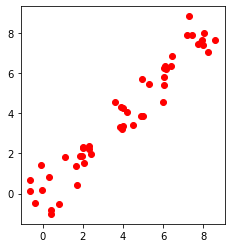

In [55]:
ax = geo_df.plot(color='red')

<AxesSubplot:>

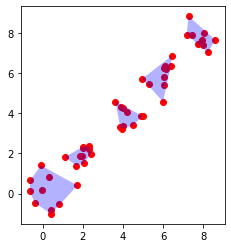

In [56]:
ax = geo_df.plot(color='red')
geo_df['convex_hull']=geo_df.convex_hull # 添加一列
geo_df.set_geometry('convex_hull',inplace=True) # 切换主列，inplace=True表示对原数据进行更新
geo_df.plot(ax=ax,color='blue',alpha=0.3)

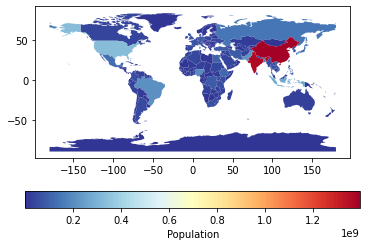

In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
legend_kwds={'orientation':'horizontal',"label":'Population'}
# cmap为色系，根据数值大小上色
# 可以试用scheme='NaturalBreaks'取代colorbar
ax = world.plot(column='pop_est',cmap='RdYlBu_r',legend=True,legend_kwds=legend_kwds)

In [71]:
world.loc[world['pop_est']>=1e8]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."
27,1.275755e+08,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
29,2.110495e+08,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
56,2.009636e+08,Africa,Nigeria,NGA,448120,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2...."
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
99,1.630462e+08,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
102,2.165653e+08,Asia,Pakistan,PAK,278221,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


<AxesSubplot:>

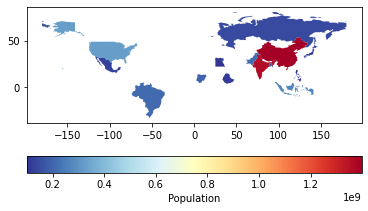

In [72]:
world.loc[world['pop_est']>=1e8].plot(column='pop_est',cmap='RdYlBu_r',legend=True,legend_kwds=legend_kwds)

In [73]:
world.iloc[:10]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot:>

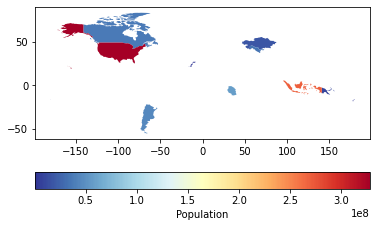

In [74]:
world.iloc[:10].plot(column='pop_est',cmap='RdYlBu_r',legend=True,legend_kwds=legend_kwds)

<AxesSubplot:>

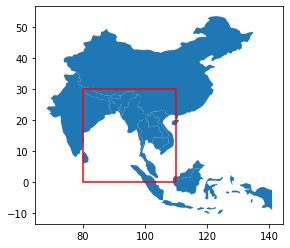

In [76]:
# cx索引方式，可以传入所需的空间范围，用于索引与传入范围相交的对应数据。通过.cx，所有与指定空间范围有重叠的对象都被选择。
# 即东经80度-110度，北纬0度-30度范围相交的几何对象
part_world = world.cx[80:110,0:30]
ax = part_world.plot()
gpd.GeoSeries([geo.box(minx=80,miny=0,maxx=110,maxy=30).boundary]).plot(ax=ax,color='red')

GEOGCS["CGCS_2000",DATUM["D_2000",SPHEROID["S_2000",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


<AxesSubplot:>

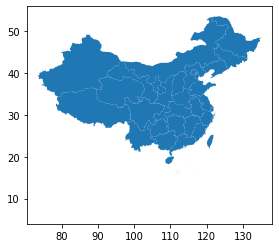

In [79]:
# 读取shp文件,并绘图
china = gpd.read_file('区划/省.shp')
print(china.crs)
china.plot()

<AxesSubplot:>

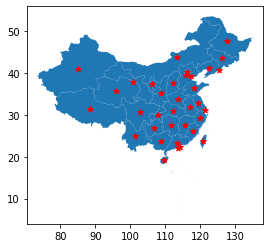

In [171]:
# Geopandas 使用 matplotlib 作为绘图后端
china['centroid'] = china.to_crs('+proj=cea').centroid.to_crs('EPSG:4326')
china_center = china.drop('geometry',axis=1)
china_center.set_geometry('centroid',inplace=True)
china_center.to_file('china_center.json')
china_center = gpd.read_file('china_center.json')
ax = china.plot()
china_center.plot(ax=ax,color='red',marker='*')

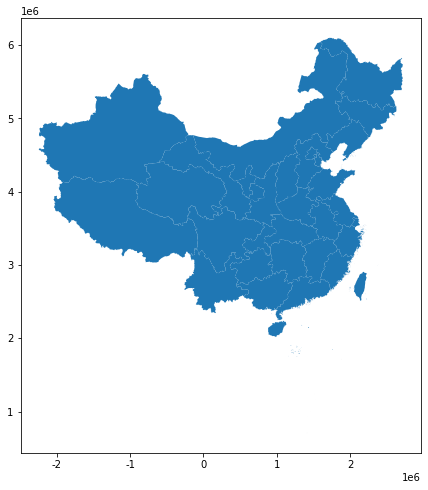

In [172]:
# 使用matplotlib设置
plt.rcParams["font.family"] = 'SimHei'
plt.figure(figsize=(8,8))
ax = plt.gca()
china.to_crs('EPSG:2380').plot(ax=ax)
plt.savefig('china.png',dpi=300)

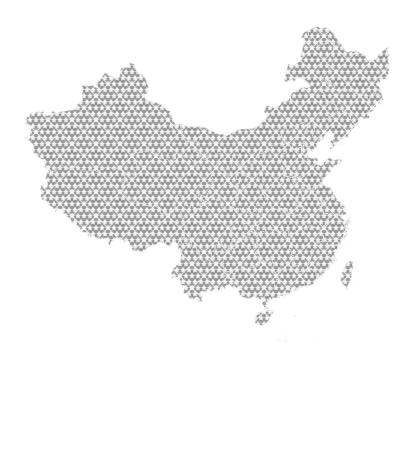

In [173]:
# 美化图片
plt.rcParams["font.family"] = 'SimHei'
plt.figure(figsize=(8,8))
ax = plt.gca()
# 增加facecolor,edgecolor=,linestyle,linewidth
# hatch指定地图上的填充物，多个hatch符号可以增加填充物的密度,并且可以混合使用，比如x*
china.to_crs('EPSG:2380').plot(ax=ax,
                               facecolor='grey',
                               edgecolor='white',
                               linestyle='--',
                               linewidth=.5,
                               hatch='x**',
                               alpha=0.8)
ax.axis('off') # 移除坐标轴
plt.savefig('china.png',dpi=300)

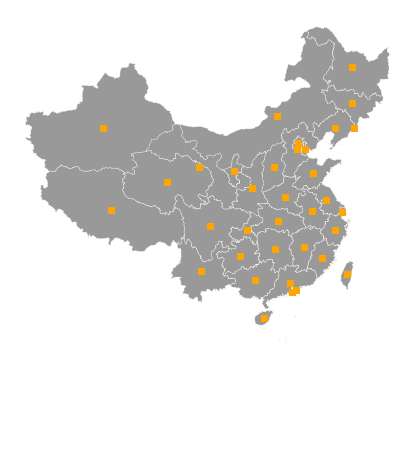

In [129]:
# 增加每个省的中心
plt.rcParams["font.family"] = 'SimHei'
plt.figure(figsize=(8,8))
ax = plt.gca()
china.to_crs('EPSG:2380').plot(ax=ax,
                               facecolor='grey',
                               edgecolor='white',
                               linestyle='--',
                               linewidth=.5,
                               alpha=0.8)
# china_center.representative_point()支持在几何体内部寻找合适的点作为该几何体的代表
china_center.representative_point().to_crs('EPSG:2380').plot(ax=ax,marker='s',color='orange')
ax.axis('off') # 移除坐标轴
plt.savefig('china.png',dpi=300)

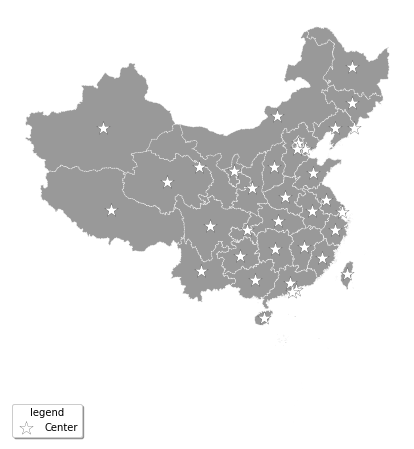

In [137]:
# 美化点
plt.rcParams["font.family"] = 'SimHei'
plt.figure(figsize=(8,8))
ax = plt.gca()
china.to_crs('EPSG:2380').plot(ax=ax,
                               edgecolor='white',
                               linestyle='--',
                               linewidth=.5,
                               alpha=0.8)
# china_center.representative_point()支持在几何体内部寻找合适的点作为该几何体的代表
china_center.representative_point().to_crs('EPSG:2380').plot(ax=ax,
                                                             marker='*',
                                                             facecolor='white',
                                                             edgecolor='black',
                                                             markersize=200,
                                                             linewidth=.2,
                                                             color='orange',
                                                            label='Center')
ax.axis('off') # 移除坐标轴
ax.legend(title='legend',loc='lower left',ncol=1,shadow=True) # 添加图例
plt.savefig('china.png',dpi=300)

(-2492720.473532001, 2969242.5145230936, 436902.2123094009, 6368022.3833877435)

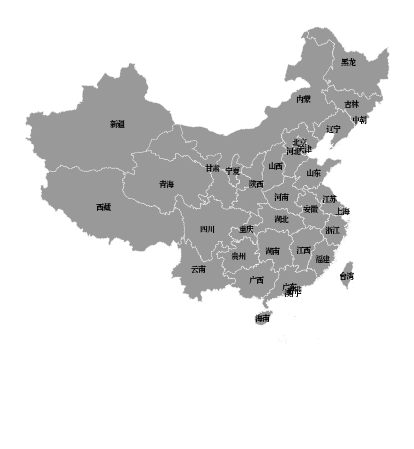

In [168]:
# 添加省份名字
plt.rcParams["font.family"] = 'SimHei' # 此处应该显示中文，但matplotlib中没有中文字体
# 自己定义字体
from matplotlib import font_manager
myfont = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Songti.ttc')

plt.figure(figsize=(8,8))
ax = plt.gca()
# print(china)
china.to_crs('EPSG:2380').plot(ax=ax,
                               facecolor='grey',
                               edgecolor='white',
                               linestyle='--',
                               linewidth=.5,
                               alpha=0.8,)
for idx, _ in enumerate(china.geometry.representative_point().to_crs('EPSG:2380')):
    # 提取省级单位简称
    region = china.loc[idx,'省'][:2]
    plt.text(_.x, _.y, region, fontproperties=myfont, ha='center', va='center', size=8)

plt.rcParams['legend.title_fontsize'] = 14
ax.axis('off') # 移除坐标轴


In [155]:
?matplotlib.rc

In [156]:
# matplotlib所有字体，里面没有中文
from matplotlib.font_manager import FontManager
import subprocess

mpl_fonts = set(f.name for f in FontManager().ttflist)

print('all font list get from matplotlib.font_manager:')
for f in sorted(mpl_fonts):
    print('\t' + f)

all font list get from matplotlib.font_manager:
	.Aqua Kana
	.Arabic UI Display
	.Arabic UI Text
	.Helvetica Neue DeskInterface
	.Keyboard
	.New York
	.SF Compact Display
	.SF Compact Rounded
	.SF Compact Text
	.SF NS Display Condensed
	.SF NS Mono
	.SF NS Rounded
	.SF NS Text Condensed
	Al Bayan
	Al Nile
	Al Tarikh
	American Typewriter
	Andale Mono
	Apple Braille
	Apple Chancery
	Apple SD Gothic Neo
	Apple Symbols
	AppleGothic
	AppleMyungjo
	Arial
	Arial Black
	Arial Hebrew
	Arial Narrow
	Arial Rounded MT Bold
	Arial Unicode MS
	Athelas
	Avenir
	Avenir Next
	Avenir Next Condensed
	Ayuthaya
	Baghdad
	Bangla MN
	Bangla Sangam MN
	Baskerville
	Beirut
	Big Caslon
	Bodoni 72
	Bodoni 72 Oldstyle
	Bodoni 72 Smallcaps
	Bodoni Ornaments
	Bradley Hand
	Brush Script MT
	Chalkboard
	Chalkboard SE
	Chalkduster
	Charter
	Cochin
	Comic Sans MS
	Copperplate
	Corsiva Hebrew
	Courier New
	DIN Alternate
	DIN Condensed
	Damascus
	DecoType Naskh
	DejaVu Sans
	DejaVu Sans Display
	DejaVu Sans Mono
	DejaVu 